## Види регресій

### Завдання 1

Використовуючи датасет з файлу **Position_Salaries.csv**, пбудуйте модель поліноміальної регресії.

### Розв'язок

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [69]:
salaries = pd.read_csv('Position_Salaries.csv')
salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [70]:
x = salaries.Level
y = salaries.Salary
print(x)
print(y)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


Text(0, 0.5, 'Salary')

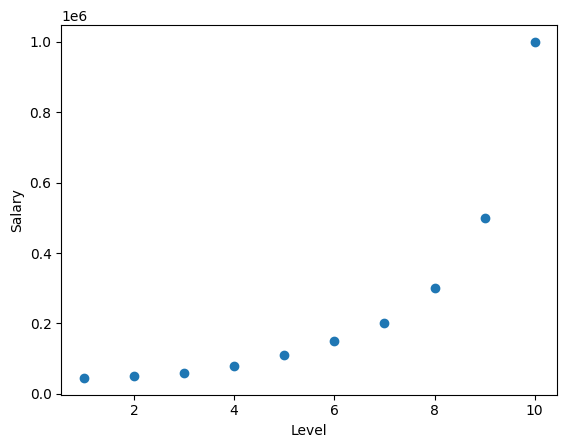

In [71]:
plt.scatter(x, y)
plt.xlabel('Level')
plt.ylabel('Salary')

Text(0.5, 1.0, 'Polynimial Regression')

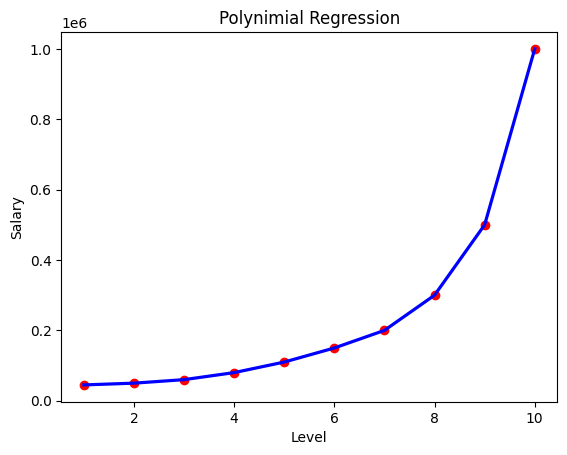

In [72]:
poly_model = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(1, 12, 50)

plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'blue', linewidth = 2.3)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynimial Regression')

In [73]:
print(poly_model)

      3             2
4120 x - 4.855e+04 x + 1.807e+05 x - 1.213e+05


In [74]:
linreg=LinearRegression()

In [75]:
x1 = np.array(x)
y1 = np.array(y)
linreg.fit(x1.reshape(-1,1), y1.reshape(-1,1))

LinearRegression()

In [76]:
y_pred = linreg.predict(x1.reshape(-1,1))

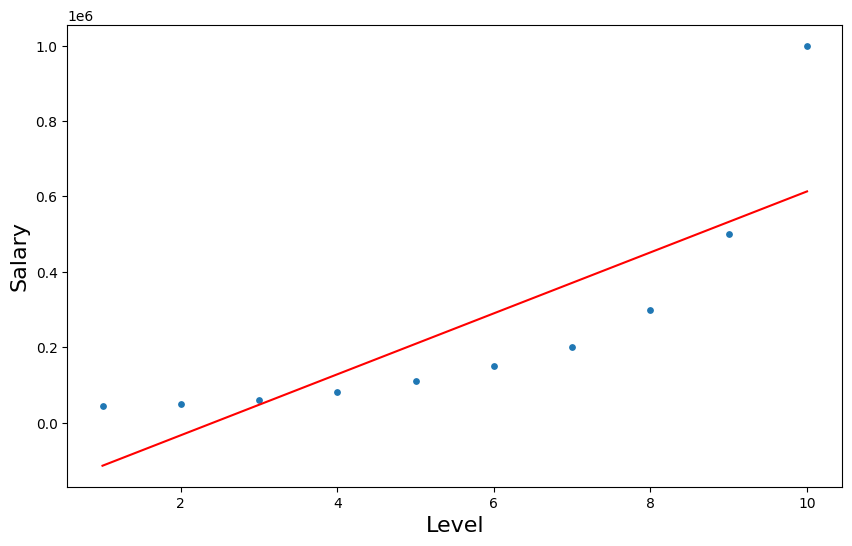

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='red')
plt.xlabel('Level',fontsize=16)
plt.ylabel('Salary',fontsize=16)
plt.show()

In [78]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 163388.73519272613


In [79]:
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x1.reshape(-1,1), y1.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('modal', LinearRegression())])

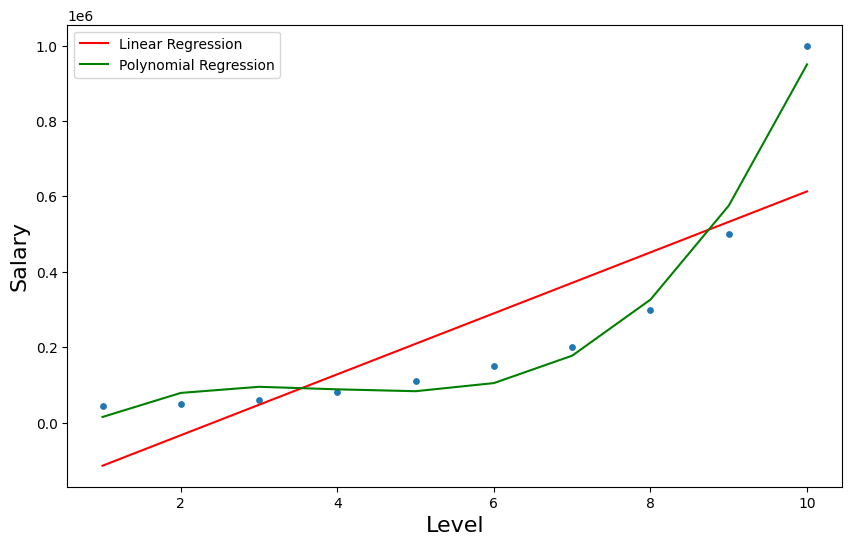

In [80]:
poly_pred=pipe.predict(x1.reshape(-1,1))
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

plt.figure(figsize=(10,6))
plt.scatter(x1,y1,s=15)
plt.plot(x1,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Level',fontsize=16)
plt.ylabel('Salary',fontsize=16)
plt.legend()
plt.show()


In [81]:
poly_pred=pipe.predict(x1.reshape(-1,1))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 38931.504012329286


## Висновок

**Полліноміальна модедь дає більш якісні показники прогностики, ніж лінійна модель.**